<a href="https://colab.research.google.com/github/FGalvao77/Hands-on-with-PySpark/blob/main/02_%5BCLASSIFICATION%5D_Machine_Learning_with_PySpark_Example_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning with PySpark: Example 2**
---
---

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

- https://data.world/informatics-edu/hepatitis-and-mortality/workspace/data-dictionary

In [2]:
df = pd.read_csv(
    filepath_or_buffer='https://query.data.world/s/p5u6e7kl6ybj3x4zp2nned3rre5ccs?dws=00000'
)

In [3]:
df.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1,85,18,4,?,no,LIVE
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135,42,3.5,?,no,LIVE
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96,32,4,?,no,LIVE
3,31,female,?,yes,no,no,no,yes,no,no,no,no,no,0.7,46,52,4,80,no,LIVE
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1,?,200,4,?,no,LIVE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AGE              155 non-null    int64 
 1   SEX              155 non-null    object
 2   STEROID          155 non-null    object
 3   ANTIVIRALS       155 non-null    object
 4   FATIGUE          155 non-null    object
 5   MALAISE          155 non-null    object
 6   ANOREXIA         155 non-null    object
 7   LIVER_BIG        155 non-null    object
 8   LIVER_FIRM       155 non-null    object
 9   SPLEEN_PALPABLE  155 non-null    object
 10  SPIDERS          155 non-null    object
 11  ASCITES          155 non-null    object
 12  VARICES          155 non-null    object
 13  BILIRUBIN        155 non-null    object
 14  ALK_PHOSPHATE    155 non-null    object
 15  SGOT             155 non-null    object
 16  ALBUMIN          155 non-null    object
 17  PROTIME          155 non-null    ob

In [5]:
df.to_csv(path_or_buf='hepatitis.csv')

In [6]:
%%capture
%pip install pyspark -U

In [7]:
import pyspark

In [8]:
print(f'[VERSION] PySpark: {pyspark.__version__}')

[VERSION] PySpark: 3.3.2


In [9]:
from pyspark.sql import SparkSession

In [10]:
spark_session = SparkSession\
    .builder\
    .master('local[*]')\
    .appName(name='Machine Learning with Pypark: Example 2')\
    .getOrCreate()

In [11]:
spark_session

In [12]:
!head hepatitis.csv

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1,85,18,4,?,no,LIVE
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135,42,3.5,?,no,LIVE
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96,32,4,?,no,LIVE
3,31,female,?,yes,no,no,no,yes,no,no,no,no,no,0.7,46,52,4,80,no,LIVE
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1,?,200,4,?,no,LIVE
5,34,female,yes,no,no,no,no,yes,no,no,no,no,no,0.9,95,28,4,75,no,LIVE
6,51,female,no,no,yes,no,yes,yes,no,yes,yes,no,no,?,?,?,?,?,no,DIE
7,23,female,yes,no,no,no,no,yes,no,no,no,no,no,1,?,?,?,?,no,LIVE
8,39,female,yes,no,yes,no,no,yes,yes,no,no,no,no,0.7,?,48,4.4,?,no,LIVE


In [13]:
df = spark_session \
        .read \
        .csv(path='hepatitis.csv',
             header=True,
             inferSchema=True)

In [14]:
type(df)

pyspark.sql.dataframe.DataFrame

In [15]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- SEX: string (nullable = true)
 |-- STEROID: string (nullable = true)
 |-- ANTIVIRALS: string (nullable = true)
 |-- FATIGUE: string (nullable = true)
 |-- MALAISE: string (nullable = true)
 |-- ANOREXIA: string (nullable = true)
 |-- LIVER_BIG: string (nullable = true)
 |-- LIVER_FIRM: string (nullable = true)
 |-- SPLEEN_PALPABLE: string (nullable = true)
 |-- SPIDERS: string (nullable = true)
 |-- ASCITES: string (nullable = true)
 |-- VARICES: string (nullable = true)
 |-- BILIRUBIN: string (nullable = true)
 |-- ALK_PHOSPHATE: string (nullable = true)
 |-- SGOT: string (nullable = true)
 |-- ALBUMIN: string (nullable = true)
 |-- PROTIME: string (nullable = true)
 |-- HISTOLOGY: string (nullable = true)
 |-- Class: string (nullable = true)



In [16]:
df.columns

['_c0',
 'AGE',
 'SEX',
 'STEROID',
 'ANTIVIRALS',
 'FATIGUE',
 'MALAISE',
 'ANOREXIA',
 'LIVER_BIG',
 'LIVER_FIRM',
 'SPLEEN_PALPABLE',
 'SPIDERS',
 'ASCITES',
 'VARICES',
 'BILIRUBIN',
 'ALK_PHOSPHATE',
 'SGOT',
 'ALBUMIN',
 'PROTIME',
 'HISTOLOGY',
 'Class']

In [17]:
df = df.select(
    'AGE',
    'SEX',
    'STEROID',
    'ANTIVIRALS',
    'FATIGUE',
    'MALAISE',
    'ANOREXIA',
    'LIVER_BIG',
    'LIVER_FIRM',
    'SPLEEN_PALPABLE',
    'SPIDERS',
    'ASCITES',
    'VARICES',
    'BILIRUBIN',
    'ALK_PHOSPHATE',
    'SGOT',
    'ALBUMIN',
    'PROTIME',
    'HISTOLOGY',
    'Class'
)

In [18]:
df.show()

+---+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+---------+-------------+----+-------+-------+---------+-----+
|AGE|   SEX|STEROID|ANTIVIRALS|FATIGUE|MALAISE|ANOREXIA|LIVER_BIG|LIVER_FIRM|SPLEEN_PALPABLE|SPIDERS|ASCITES|VARICES|BILIRUBIN|ALK_PHOSPHATE|SGOT|ALBUMIN|PROTIME|HISTOLOGY|Class|
+---+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+---------+-------------+----+-------+-------+---------+-----+
| 30|  male|     no|        no|     no|     no|      no|       no|        no|             no|     no|     no|     no|        1|           85|  18|      4|      ?|       no| LIVE|
| 50|female|     no|        no|    yes|     no|      no|       no|        no|             no|     no|     no|     no|      0.9|          135|  42|    3.5|      ?|       no| LIVE|
| 78|female|    yes|        no|    yes|     no|      no|      yes|        no|             no|     no|    

In [19]:
df.columns

['AGE',
 'SEX',
 'STEROID',
 'ANTIVIRALS',
 'FATIGUE',
 'MALAISE',
 'ANOREXIA',
 'LIVER_BIG',
 'LIVER_FIRM',
 'SPLEEN_PALPABLE',
 'SPIDERS',
 'ASCITES',
 'VARICES',
 'BILIRUBIN',
 'ALK_PHOSPHATE',
 'SGOT',
 'ALBUMIN',
 'PROTIME',
 'HISTOLOGY',
 'Class']

In [20]:
df.groupby('Class').count().show()

+-----+-----+
|Class|count|
+-----+-----+
|  DIE|   32|
| LIVE|  123|
+-----+-----+



In [21]:
df.groupBy('Class').count().sort('Class').toPandas()

,Class,count
0,DIE,32
1,LIVE,123


In [22]:
df.dtypes

[('AGE', 'int'),
 ('SEX', 'string'),
 ('STEROID', 'string'),
 ('ANTIVIRALS', 'string'),
 ('FATIGUE', 'string'),
 ('MALAISE', 'string'),
 ('ANOREXIA', 'string'),
 ('LIVER_BIG', 'string'),
 ('LIVER_FIRM', 'string'),
 ('SPLEEN_PALPABLE', 'string'),
 ('SPIDERS', 'string'),
 ('ASCITES', 'string'),
 ('VARICES', 'string'),
 ('BILIRUBIN', 'string'),
 ('ALK_PHOSPHATE', 'string'),
 ('SGOT', 'string'),
 ('ALBUMIN', 'string'),
 ('PROTIME', 'string'),
 ('HISTOLOGY', 'string'),
 ('Class', 'string')]

In [23]:
df.show(n=10)

+---+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+---------+-------------+----+-------+-------+---------+-----+
|AGE|   SEX|STEROID|ANTIVIRALS|FATIGUE|MALAISE|ANOREXIA|LIVER_BIG|LIVER_FIRM|SPLEEN_PALPABLE|SPIDERS|ASCITES|VARICES|BILIRUBIN|ALK_PHOSPHATE|SGOT|ALBUMIN|PROTIME|HISTOLOGY|Class|
+---+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+---------+-------------+----+-------+-------+---------+-----+
| 30|  male|     no|        no|     no|     no|      no|       no|        no|             no|     no|     no|     no|        1|           85|  18|      4|      ?|       no| LIVE|
| 50|female|     no|        no|    yes|     no|      no|       no|        no|             no|     no|     no|     no|      0.9|          135|  42|    3.5|      ?|       no| LIVE|
| 78|female|    yes|        no|    yes|     no|      no|      yes|        no|             no|     no|    

In [24]:
df.describe().show()

+-------+------------------+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+------------------+------------------+-----------------+------------------+-----------------+---------+-----+
|summary|               AGE|   SEX|STEROID|ANTIVIRALS|FATIGUE|MALAISE|ANOREXIA|LIVER_BIG|LIVER_FIRM|SPLEEN_PALPABLE|SPIDERS|ASCITES|VARICES|         BILIRUBIN|     ALK_PHOSPHATE|             SGOT|           ALBUMIN|          PROTIME|HISTOLOGY|Class|
+-------+------------------+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+------------------+------------------+-----------------+------------------+-----------------+---------+-----+
|  count|               155|   155|    155|       155|    155|    155|     155|      155|       155|            155|    155|    155|    155|               155|               155|              155|               155|              155|      155|  155|


In [25]:
def dataframe_dim(df: object) -> object:
    num_rows = df.count()
    num_cols = len(df.columns)
    return (f'Rows: {num_rows} | Cols: {num_cols}')

In [26]:
dataframe_dim(df=df)

'Rows: 155 | Cols: 20'

In [27]:
import pyspark.ml

In [28]:
dir(pyspark.ml)

['Estimator',
 'Model',
 'Pipeline',
 'PipelineModel',
 'PredictionModel',
 'Predictor',
 'Transformer',
 'UnaryTransformer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'classification',
 'clustering',
 'common',
 'evaluation',
 'feature',
 'fpm',
 'image',
 'linalg',
 'param',
 'pipeline',
 'recommendation',
 'regression',
 'stat',
 'tree',
 'tuning',
 'util',
 'wrapper']

In [29]:
df.show(5)

+---+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+---------+-------------+----+-------+-------+---------+-----+
|AGE|   SEX|STEROID|ANTIVIRALS|FATIGUE|MALAISE|ANOREXIA|LIVER_BIG|LIVER_FIRM|SPLEEN_PALPABLE|SPIDERS|ASCITES|VARICES|BILIRUBIN|ALK_PHOSPHATE|SGOT|ALBUMIN|PROTIME|HISTOLOGY|Class|
+---+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+---------+-------------+----+-------+-------+---------+-----+
| 30|  male|     no|        no|     no|     no|      no|       no|        no|             no|     no|     no|     no|        1|           85|  18|      4|      ?|       no| LIVE|
| 50|female|     no|        no|    yes|     no|      no|       no|        no|             no|     no|     no|     no|      0.9|          135|  42|    3.5|      ?|       no| LIVE|
| 78|female|    yes|        no|    yes|     no|      no|      yes|        no|             no|     no|    

In [30]:
df.groupby('SEX').count().show()

+------+-----+
|   SEX|count|
+------+-----+
|female|  139|
|  male|   16|
+------+-----+



In [31]:
df.select('SEX').count()

155

In [32]:
from pyspark.ml.feature import VectorAssembler, StringIndexer

In [33]:
df.show(n=3)

+---+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+---------+-------------+----+-------+-------+---------+-----+
|AGE|   SEX|STEROID|ANTIVIRALS|FATIGUE|MALAISE|ANOREXIA|LIVER_BIG|LIVER_FIRM|SPLEEN_PALPABLE|SPIDERS|ASCITES|VARICES|BILIRUBIN|ALK_PHOSPHATE|SGOT|ALBUMIN|PROTIME|HISTOLOGY|Class|
+---+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+---------+-------------+----+-------+-------+---------+-----+
| 30|  male|     no|        no|     no|     no|      no|       no|        no|             no|     no|     no|     no|        1|           85|  18|      4|      ?|       no| LIVE|
| 50|female|     no|        no|    yes|     no|      no|       no|        no|             no|     no|     no|     no|      0.9|          135|  42|    3.5|      ?|       no| LIVE|
| 78|female|    yes|        no|    yes|     no|      no|      yes|        no|             no|     no|    

In [34]:
df.dtypes

[('AGE', 'int'),
 ('SEX', 'string'),
 ('STEROID', 'string'),
 ('ANTIVIRALS', 'string'),
 ('FATIGUE', 'string'),
 ('MALAISE', 'string'),
 ('ANOREXIA', 'string'),
 ('LIVER_BIG', 'string'),
 ('LIVER_FIRM', 'string'),
 ('SPLEEN_PALPABLE', 'string'),
 ('SPIDERS', 'string'),
 ('ASCITES', 'string'),
 ('VARICES', 'string'),
 ('BILIRUBIN', 'string'),
 ('ALK_PHOSPHATE', 'string'),
 ('SGOT', 'string'),
 ('ALBUMIN', 'string'),
 ('PROTIME', 'string'),
 ('HISTOLOGY', 'string'),
 ('Class', 'string')]

In [35]:
df.columns

['AGE',
 'SEX',
 'STEROID',
 'ANTIVIRALS',
 'FATIGUE',
 'MALAISE',
 'ANOREXIA',
 'LIVER_BIG',
 'LIVER_FIRM',
 'SPLEEN_PALPABLE',
 'SPIDERS',
 'ASCITES',
 'VARICES',
 'BILIRUBIN',
 'ALK_PHOSPHATE',
 'SGOT',
 'ALBUMIN',
 'PROTIME',
 'HISTOLOGY',
 'Class']

In [36]:
indexer = StringIndexer(
    inputCols=['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 
               'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 
               'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 
               'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 
               'PROTIME', 'HISTOLOGY'],
               
    outputCols=['SEX_idx', 'STEROID_idx', 'ANTIVIRALS_idx', 'FATIGUE_idx', 
               'MALAISE_idx', 'ANOREXIA_idx', 'LIVER_BIG_idx', 'LIVER_FIRM_idx', 
               'SPLEEN_PALPABLE_idx', 'SPIDERS_idx', 'ASCITES_idx', 'VARICES_idx', 
               'BILIRUBIN_idx', 'ALK_PHOSPHATE_idx', 'SGOT_idx', 'ALBUMIN_idx', 
               'PROTIME_idx', 'HISTOLOGY_idx'],
).fit(df)

In [37]:
df = indexer.transform(dataset=df)

In [38]:
df.dtypes

[('AGE', 'int'),
 ('SEX', 'string'),
 ('STEROID', 'string'),
 ('ANTIVIRALS', 'string'),
 ('FATIGUE', 'string'),
 ('MALAISE', 'string'),
 ('ANOREXIA', 'string'),
 ('LIVER_BIG', 'string'),
 ('LIVER_FIRM', 'string'),
 ('SPLEEN_PALPABLE', 'string'),
 ('SPIDERS', 'string'),
 ('ASCITES', 'string'),
 ('VARICES', 'string'),
 ('BILIRUBIN', 'string'),
 ('ALK_PHOSPHATE', 'string'),
 ('SGOT', 'string'),
 ('ALBUMIN', 'string'),
 ('PROTIME', 'string'),
 ('HISTOLOGY', 'string'),
 ('Class', 'string'),
 ('SEX_idx', 'double'),
 ('STEROID_idx', 'double'),
 ('ANTIVIRALS_idx', 'double'),
 ('FATIGUE_idx', 'double'),
 ('MALAISE_idx', 'double'),
 ('ANOREXIA_idx', 'double'),
 ('LIVER_BIG_idx', 'double'),
 ('LIVER_FIRM_idx', 'double'),
 ('SPLEEN_PALPABLE_idx', 'double'),
 ('SPIDERS_idx', 'double'),
 ('ASCITES_idx', 'double'),
 ('VARICES_idx', 'double'),
 ('BILIRUBIN_idx', 'double'),
 ('ALK_PHOSPHATE_idx', 'double'),
 ('SGOT_idx', 'double'),
 ('ALBUMIN_idx', 'double'),
 ('PROTIME_idx', 'double'),
 ('HISTOLOGY_id

In [39]:
df.show()

+---+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+---------+-------------+----+-------+-------+---------+-----+-------+-----------+--------------+-----------+-----------+------------+-------------+--------------+-------------------+-----------+-----------+-----------+-------------+-----------------+--------+-----------+-----------+-------------+
|AGE|   SEX|STEROID|ANTIVIRALS|FATIGUE|MALAISE|ANOREXIA|LIVER_BIG|LIVER_FIRM|SPLEEN_PALPABLE|SPIDERS|ASCITES|VARICES|BILIRUBIN|ALK_PHOSPHATE|SGOT|ALBUMIN|PROTIME|HISTOLOGY|Class|SEX_idx|STEROID_idx|ANTIVIRALS_idx|FATIGUE_idx|MALAISE_idx|ANOREXIA_idx|LIVER_BIG_idx|LIVER_FIRM_idx|SPLEEN_PALPABLE_idx|SPIDERS_idx|ASCITES_idx|VARICES_idx|BILIRUBIN_idx|ALK_PHOSPHATE_idx|SGOT_idx|ALBUMIN_idx|PROTIME_idx|HISTOLOGY_idx|
+---+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+---------+-------------+----+-------+-------+--------

In [40]:
cat_encoder = StringIndexer(
    inputCol='Class', 
    outputCol='TARGET'
).fit(df)

In [41]:
df = cat_encoder.transform(df)

In [42]:
df.show(n=3)

+---+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+---------+-------------+----+-------+-------+---------+-----+-------+-----------+--------------+-----------+-----------+------------+-------------+--------------+-------------------+-----------+-----------+-----------+-------------+-----------------+--------+-----------+-----------+-------------+------+
|AGE|   SEX|STEROID|ANTIVIRALS|FATIGUE|MALAISE|ANOREXIA|LIVER_BIG|LIVER_FIRM|SPLEEN_PALPABLE|SPIDERS|ASCITES|VARICES|BILIRUBIN|ALK_PHOSPHATE|SGOT|ALBUMIN|PROTIME|HISTOLOGY|Class|SEX_idx|STEROID_idx|ANTIVIRALS_idx|FATIGUE_idx|MALAISE_idx|ANOREXIA_idx|LIVER_BIG_idx|LIVER_FIRM_idx|SPLEEN_PALPABLE_idx|SPIDERS_idx|ASCITES_idx|VARICES_idx|BILIRUBIN_idx|ALK_PHOSPHATE_idx|SGOT_idx|ALBUMIN_idx|PROTIME_idx|HISTOLOGY_idx|TARGET|
+---+------+-------+----------+-------+-------+--------+---------+----------+---------------+-------+-------+-------+---------+-------------+----+-------+--

In [43]:
df.columns

['AGE',
 'SEX',
 'STEROID',
 'ANTIVIRALS',
 'FATIGUE',
 'MALAISE',
 'ANOREXIA',
 'LIVER_BIG',
 'LIVER_FIRM',
 'SPLEEN_PALPABLE',
 'SPIDERS',
 'ASCITES',
 'VARICES',
 'BILIRUBIN',
 'ALK_PHOSPHATE',
 'SGOT',
 'ALBUMIN',
 'PROTIME',
 'HISTOLOGY',
 'Class',
 'SEX_idx',
 'STEROID_idx',
 'ANTIVIRALS_idx',
 'FATIGUE_idx',
 'MALAISE_idx',
 'ANOREXIA_idx',
 'LIVER_BIG_idx',
 'LIVER_FIRM_idx',
 'SPLEEN_PALPABLE_idx',
 'SPIDERS_idx',
 'ASCITES_idx',
 'VARICES_idx',
 'BILIRUBIN_idx',
 'ALK_PHOSPHATE_idx',
 'SGOT_idx',
 'ALBUMIN_idx',
 'PROTIME_idx',
 'HISTOLOGY_idx',
 'TARGET']

In [44]:
df2 = df.select(
    'AGE',
    'SEX_idx',
    'STEROID_idx',
    'ANTIVIRALS_idx',
    'FATIGUE_idx',
    'MALAISE_idx',
    'ANOREXIA_idx',
    'LIVER_BIG_idx',
    'LIVER_FIRM_idx',
    'SPLEEN_PALPABLE_idx',
    'SPIDERS_idx',
    'ASCITES_idx',
    'VARICES_idx',
    'BILIRUBIN_idx',
    'ALK_PHOSPHATE_idx',
    'SGOT_idx',
    'ALBUMIN_idx',
    'PROTIME_idx',
    'HISTOLOGY_idx',
    'TARGET'
)

In [45]:
df2.show()

+---+-------+-----------+--------------+-----------+-----------+------------+-------------+--------------+-------------------+-----------+-----------+-----------+-------------+-----------------+--------+-----------+-----------+-------------+------+
|AGE|SEX_idx|STEROID_idx|ANTIVIRALS_idx|FATIGUE_idx|MALAISE_idx|ANOREXIA_idx|LIVER_BIG_idx|LIVER_FIRM_idx|SPLEEN_PALPABLE_idx|SPIDERS_idx|ASCITES_idx|VARICES_idx|BILIRUBIN_idx|ALK_PHOSPHATE_idx|SGOT_idx|ALBUMIN_idx|PROTIME_idx|HISTOLOGY_idx|TARGET|
+---+-------+-----------+--------------+-----------+-----------+------------+-------------+--------------+-------------------+-----------+-----------+-----------+-------------+-----------------+--------+-----------+-----------+-------------+------+
| 30|    1.0|        1.0|           0.0|        1.0|        0.0|         0.0|          1.0|           0.0|                0.0|        0.0|        0.0|        0.0|          0.0|              1.0|     5.0|        0.0|        0.0|          0.0|   0.0|
| 50

In [46]:
df2.printSchema()

root
 |-- AGE: integer (nullable = true)
 |-- SEX_idx: double (nullable = false)
 |-- STEROID_idx: double (nullable = false)
 |-- ANTIVIRALS_idx: double (nullable = false)
 |-- FATIGUE_idx: double (nullable = false)
 |-- MALAISE_idx: double (nullable = false)
 |-- ANOREXIA_idx: double (nullable = false)
 |-- LIVER_BIG_idx: double (nullable = false)
 |-- LIVER_FIRM_idx: double (nullable = false)
 |-- SPLEEN_PALPABLE_idx: double (nullable = false)
 |-- SPIDERS_idx: double (nullable = false)
 |-- ASCITES_idx: double (nullable = false)
 |-- VARICES_idx: double (nullable = false)
 |-- BILIRUBIN_idx: double (nullable = false)
 |-- ALK_PHOSPHATE_idx: double (nullable = false)
 |-- SGOT_idx: double (nullable = false)
 |-- ALBUMIN_idx: double (nullable = false)
 |-- PROTIME_idx: double (nullable = false)
 |-- HISTOLOGY_idx: double (nullable = false)
 |-- TARGET: double (nullable = false)



In [47]:
df2 = df2.toPandas().replace(
    to_replace='NA', value=0
).astype(float)

In [48]:
type(df2)

pandas.core.frame.DataFrame

In [49]:
df_spark = spark_session.createDataFrame(
    data=df2
)

In [50]:
type(df_spark)

pyspark.sql.dataframe.DataFrame

In [51]:
df_spark.show(n=5)

+----+-------+-----------+--------------+-----------+-----------+------------+-------------+--------------+-------------------+-----------+-----------+-----------+-------------+-----------------+--------+-----------+-----------+-------------+------+
| AGE|SEX_idx|STEROID_idx|ANTIVIRALS_idx|FATIGUE_idx|MALAISE_idx|ANOREXIA_idx|LIVER_BIG_idx|LIVER_FIRM_idx|SPLEEN_PALPABLE_idx|SPIDERS_idx|ASCITES_idx|VARICES_idx|BILIRUBIN_idx|ALK_PHOSPHATE_idx|SGOT_idx|ALBUMIN_idx|PROTIME_idx|HISTOLOGY_idx|TARGET|
+----+-------+-----------+--------------+-----------+-----------+------------+-------------+--------------+-------------------+-----------+-----------+-----------+-------------+-----------------+--------+-----------+-----------+-------------+------+
|30.0|    1.0|        1.0|           0.0|        1.0|        0.0|         0.0|          1.0|           0.0|                0.0|        0.0|        0.0|        0.0|          0.0|              1.0|     5.0|        0.0|        0.0|          0.0|   0.0|


In [52]:
df_spark.printSchema()

root
 |-- AGE: double (nullable = true)
 |-- SEX_idx: double (nullable = true)
 |-- STEROID_idx: double (nullable = true)
 |-- ANTIVIRALS_idx: double (nullable = true)
 |-- FATIGUE_idx: double (nullable = true)
 |-- MALAISE_idx: double (nullable = true)
 |-- ANOREXIA_idx: double (nullable = true)
 |-- LIVER_BIG_idx: double (nullable = true)
 |-- LIVER_FIRM_idx: double (nullable = true)
 |-- SPLEEN_PALPABLE_idx: double (nullable = true)
 |-- SPIDERS_idx: double (nullable = true)
 |-- ASCITES_idx: double (nullable = true)
 |-- VARICES_idx: double (nullable = true)
 |-- BILIRUBIN_idx: double (nullable = true)
 |-- ALK_PHOSPHATE_idx: double (nullable = true)
 |-- SGOT_idx: double (nullable = true)
 |-- ALBUMIN_idx: double (nullable = true)
 |-- PROTIME_idx: double (nullable = true)
 |-- HISTOLOGY_idx: double (nullable = true)
 |-- TARGET: double (nullable = true)



In [53]:
df_spark.columns

['AGE',
 'SEX_idx',
 'STEROID_idx',
 'ANTIVIRALS_idx',
 'FATIGUE_idx',
 'MALAISE_idx',
 'ANOREXIA_idx',
 'LIVER_BIG_idx',
 'LIVER_FIRM_idx',
 'SPLEEN_PALPABLE_idx',
 'SPIDERS_idx',
 'ASCITES_idx',
 'VARICES_idx',
 'BILIRUBIN_idx',
 'ALK_PHOSPHATE_idx',
 'SGOT_idx',
 'ALBUMIN_idx',
 'PROTIME_idx',
 'HISTOLOGY_idx',
 'TARGET']

In [54]:
features = [
    'AGE',
    'SEX_idx',
    'STEROID_idx',
    'ANTIVIRALS_idx',
    'FATIGUE_idx',
    'MALAISE_idx',
    'ANOREXIA_idx',
    'LIVER_BIG_idx',
    'LIVER_FIRM_idx',
    'SPLEEN_PALPABLE_idx',
    'SPIDERS_idx',
    'ASCITES_idx',
    'VARICES_idx',
    'BILIRUBIN_idx',
    'ALK_PHOSPHATE_idx',
    'SGOT_idx',
    'ALBUMIN_idx',
    'PROTIME_idx',
    'HISTOLOGY_idx',
    'TARGET'
]

In [55]:
vector = VectorAssembler(
    inputCols=features,
    outputCol='input_features'
)

In [56]:
vector_df = vector.transform(df_spark)

In [57]:
vector_df.show(n=5)

+----+-------+-----------+--------------+-----------+-----------+------------+-------------+--------------+-------------------+-----------+-----------+-----------+-------------+-----------------+--------+-----------+-----------+-------------+------+--------------------+
| AGE|SEX_idx|STEROID_idx|ANTIVIRALS_idx|FATIGUE_idx|MALAISE_idx|ANOREXIA_idx|LIVER_BIG_idx|LIVER_FIRM_idx|SPLEEN_PALPABLE_idx|SPIDERS_idx|ASCITES_idx|VARICES_idx|BILIRUBIN_idx|ALK_PHOSPHATE_idx|SGOT_idx|ALBUMIN_idx|PROTIME_idx|HISTOLOGY_idx|TARGET|      input_features|
+----+-------+-----------+--------------+-----------+-----------+------------+-------------+--------------+-------------------+-----------+-----------+-----------+-------------+-----------------+--------+-----------+-----------+-------------+------+--------------------+
|30.0|    1.0|        1.0|           0.0|        1.0|        0.0|         0.0|          1.0|           0.0|                0.0|        0.0|        0.0|        0.0|          0.0|          

In [58]:
(train_data, val_data) = vector_df.randomSplit(
    weights=[0.80, 0.20],
    seed=1522
)

In [59]:
train_data.count(), val_data.count()

(120, 35)

In [60]:
train_data.show(n=5)

+----+-------+-----------+--------------+-----------+-----------+------------+-------------+--------------+-------------------+-----------+-----------+-----------+-------------+-----------------+--------+-----------+-----------+-------------+------+--------------------+
| AGE|SEX_idx|STEROID_idx|ANTIVIRALS_idx|FATIGUE_idx|MALAISE_idx|ANOREXIA_idx|LIVER_BIG_idx|LIVER_FIRM_idx|SPLEEN_PALPABLE_idx|SPIDERS_idx|ASCITES_idx|VARICES_idx|BILIRUBIN_idx|ALK_PHOSPHATE_idx|SGOT_idx|ALBUMIN_idx|PROTIME_idx|HISTOLOGY_idx|TARGET|      input_features|
+----+-------+-----------+--------------+-----------+-----------+------------+-------------+--------------+-------------------+-----------+-----------+-----------+-------------+-----------------+--------+-----------+-----------+-------------+------+--------------------+
|20.0|    1.0|        1.0|           0.0|        0.0|        1.0|         1.0|          1.0|           1.0|                1.0|        1.0|        0.0|        0.0|         13.0|          

In [61]:
from pyspark.ml.classification import (LogisticRegression, 
                                       DecisionTreeClassifier,
                                       RandomForestClassifier, 
                                       NaiveBayes)

In [62]:
train_data.columns

['AGE',
 'SEX_idx',
 'STEROID_idx',
 'ANTIVIRALS_idx',
 'FATIGUE_idx',
 'MALAISE_idx',
 'ANOREXIA_idx',
 'LIVER_BIG_idx',
 'LIVER_FIRM_idx',
 'SPLEEN_PALPABLE_idx',
 'SPIDERS_idx',
 'ASCITES_idx',
 'VARICES_idx',
 'BILIRUBIN_idx',
 'ALK_PHOSPHATE_idx',
 'SGOT_idx',
 'ALBUMIN_idx',
 'PROTIME_idx',
 'HISTOLOGY_idx',
 'TARGET',
 'input_features']

In [63]:
mdl_logReg = LogisticRegression(
    featuresCol='input_features',
    labelCol='TARGET'
)

mdl_decTree = DecisionTreeClassifier(
    featuresCol='input_features',
    labelCol='TARGET'
)

mdl_randFor = RandomForestClassifier(
    featuresCol='input_features',
    labelCol='TARGET'
)

mdl_nBayes = NaiveBayes(
    featuresCol='input_features',
    labelCol='TARGET'
)

In [64]:
mdl_training_logReg = mdl_logReg.fit(train_data)
mdl_training_decTree = mdl_decTree.fit(train_data)
mdl_training_randFor = mdl_randFor.fit(train_data)
mdl_training_nBayes = mdl_nBayes.fit(train_data)

In [65]:
pred_logReg = mdl_training_logReg.transform(val_data)
pred_decTree = mdl_training_decTree.transform(val_data)
pred_randFor = mdl_training_randFor.transform(val_data)
pred_nBayes = mdl_training_nBayes.transform(val_data)

In [66]:
pred_logReg.show(n=50)

+----+-------+-----------+--------------+-----------+-----------+------------+-------------+--------------+-------------------+-----------+-----------+-----------+-------------+-----------------+--------+-----------+-----------+-------------+------+--------------------+--------------------+--------------------+----------+
| AGE|SEX_idx|STEROID_idx|ANTIVIRALS_idx|FATIGUE_idx|MALAISE_idx|ANOREXIA_idx|LIVER_BIG_idx|LIVER_FIRM_idx|SPLEEN_PALPABLE_idx|SPIDERS_idx|ASCITES_idx|VARICES_idx|BILIRUBIN_idx|ALK_PHOSPHATE_idx|SGOT_idx|ALBUMIN_idx|PROTIME_idx|HISTOLOGY_idx|TARGET|      input_features|       rawPrediction|         probability|prediction|
+----+-------+-----------+--------------+-----------+-----------+------------+-------------+--------------+-------------------+-----------+-----------+-----------+-------------+-----------------+--------+-----------+-----------+-------------+------+--------------------+--------------------+--------------------+----------+
|24.0|    0.0|        0.0|  

In [67]:
pred_logReg.columns

['AGE',
 'SEX_idx',
 'STEROID_idx',
 'ANTIVIRALS_idx',
 'FATIGUE_idx',
 'MALAISE_idx',
 'ANOREXIA_idx',
 'LIVER_BIG_idx',
 'LIVER_FIRM_idx',
 'SPLEEN_PALPABLE_idx',
 'SPIDERS_idx',
 'ASCITES_idx',
 'VARICES_idx',
 'BILIRUBIN_idx',
 'ALK_PHOSPHATE_idx',
 'SGOT_idx',
 'ALBUMIN_idx',
 'PROTIME_idx',
 'HISTOLOGY_idx',
 'TARGET',
 'input_features',
 'rawPrediction',
 'probability',
 'prediction']

In [68]:
pred_logReg.select('input_features', 'TARGET',
                   'rawPrediction', 'probability', 'prediction').show()

+--------------------+------+--------------------+--------------------+----------+
|      input_features|TARGET|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|(20,[0,4,13,14,15...|   0.0|[20.2411414761408...|[0.99999999838048...|       0.0|
|(20,[0,1,2,3,4,13...|   0.0|[20.0932058059995...|[0.99999999812227...|       0.0|
|(20,[0,4,15,16],[...|   0.0|[20.1472023969731...|[0.99999999822097...|       0.0|
|(20,[0,1,2,4,7,14...|   0.0|[21.0394949608087...|[0.99999999927110...|       0.0|
|(20,[0,2,3,4,13,1...|   0.0|[19.6487231072844...|[0.99999999707134...|       0.0|
|(20,[0,3,8,10,14,...|   0.0|[19.3874235894077...|[0.99999999619680...|       0.0|
|(20,[0,2,5,6,8,15...|   0.0|[19.4205928607977...|[0.99999999632088...|       0.0|
|(20,[0,2,4,9,13,1...|   0.0|[19.4702928938569...|[0.99999999649926...|       0.0|
|(20,[0,10,13,14,1...|   1.0|[-18.014097795649...|[1.50167767526572...|       1.0|
|(20

In [69]:
pred_decTree.select('input_features', 'TARGET',
                    'rawPrediction', 'probability', 'prediction').show()

+--------------------+------+-------------+-----------+----------+
|      input_features|TARGET|rawPrediction|probability|prediction|
+--------------------+------+-------------+-----------+----------+
|(20,[0,4,13,14,15...|   0.0|   [98.0,0.0]|  [1.0,0.0]|       0.0|
|(20,[0,1,2,3,4,13...|   0.0|   [98.0,0.0]|  [1.0,0.0]|       0.0|
|(20,[0,4,15,16],[...|   0.0|   [98.0,0.0]|  [1.0,0.0]|       0.0|
|(20,[0,1,2,4,7,14...|   0.0|   [98.0,0.0]|  [1.0,0.0]|       0.0|
|(20,[0,2,3,4,13,1...|   0.0|   [98.0,0.0]|  [1.0,0.0]|       0.0|
|(20,[0,3,8,10,14,...|   0.0|   [98.0,0.0]|  [1.0,0.0]|       0.0|
|(20,[0,2,5,6,8,15...|   0.0|   [98.0,0.0]|  [1.0,0.0]|       0.0|
|(20,[0,2,4,9,13,1...|   0.0|   [98.0,0.0]|  [1.0,0.0]|       0.0|
|(20,[0,10,13,14,1...|   1.0|   [0.0,22.0]|  [0.0,1.0]|       1.0|
|(20,[0,2,4,8,10,1...|   0.0|   [98.0,0.0]|  [1.0,0.0]|       0.0|
|(20,[0,2,4,14,15,...|   0.0|   [98.0,0.0]|  [1.0,0.0]|       0.0|
|(20,[0,2,3,5,14,1...|   0.0|   [98.0,0.0]|  [1.0,0.0]|       

In [70]:
pred_randFor.select('input_features', 'TARGET',
                    'rawPrediction', 'probability', 'prediction').show()

+--------------------+------+--------------------+--------------------+----------+
|      input_features|TARGET|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|(20,[0,4,13,14,15...|   0.0|[19.9891304347826...|[0.99945652173913...|       0.0|
|(20,[0,1,2,3,4,13...|   0.0|[19.3224637681159...|[0.96612318840579...|       0.0|
|(20,[0,4,15,16],[...|   0.0|[19.9891304347826...|[0.99945652173913...|       0.0|
|(20,[0,1,2,4,7,14...|   0.0|[19.9891304347826...|[0.99945652173913...|       0.0|
|(20,[0,2,3,4,13,1...|   0.0|[19.9891304347826...|[0.99945652173913...|       0.0|
|(20,[0,3,8,10,14,...|   0.0|[18.8714833759590...|[0.94357416879795...|       0.0|
|(20,[0,2,5,6,8,15...|   0.0|[19.8982213438735...|[0.99491106719367...|       0.0|
|(20,[0,2,4,9,13,1...|   0.0|          [20.0,0.0]|           [1.0,0.0]|       0.0|
|(20,[0,10,13,14,1...|   1.0|[8.87148337595908...|[0.44357416879795...|       1.0|
|(20

In [71]:
pred_nBayes.select('input_features', 'TARGET',
                   'rawPrediction', 'probability', 'prediction').show()

+--------------------+------+--------------------+--------------------+----------+
|      input_features|TARGET|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|(20,[0,4,13,14,15...|   0.0|[-188.37784663869...|[0.99999995075425...|       0.0|
|(20,[0,1,2,3,4,13...|   0.0|[-271.07133443842...|[0.96942025682618...|       0.0|
|(20,[0,4,15,16],[...|   0.0|[-77.998490016045...|[0.99880160261267...|       0.0|
|(20,[0,1,2,4,7,14...|   0.0|[-65.843001231535...|[0.99754538340399...|       0.0|
|(20,[0,2,3,4,13,1...|   0.0|[-235.36235047011...|[0.99999999477876...|       0.0|
|(20,[0,3,8,10,14,...|   0.0|[-325.83129081052...|[0.99999999988703...|       0.0|
|(20,[0,2,5,6,8,15...|   0.0|[-128.59172458697...|[0.99994081197973...|       0.0|
|(20,[0,2,4,9,13,1...|   0.0|[-105.35431244521...|[0.93208928753265...|       0.0|
|(20,[0,10,13,14,1...|   1.0|[-190.20305261148...|[0.99287314780453...|       0.0|
|(20

In [72]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [73]:
eval = MulticlassClassificationEvaluator(
    predictionCol='prediction',         # coluna da predição final realizada
    labelCol='TARGET',                  # coluna do atributo alvo - valor real
    metricName='accuracy'               # métrica de avaliação
)

In [74]:
dir(eval)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_call_java',
 '_copyValues',
 '_copy_params',
 '_create_from_java_class',
 '_create_params_from_java',
 '_defaultParamMap',
 '_dummy',
 '_empty_java_param_map',
 '_evaluate',
 '_from_java',
 '_input_kwargs',
 '_is_protocol',
 '_java_obj',
 '_make_java_param_pair',
 '_new_java_array',
 '_new_java_obj',
 '_paramMap',
 '_params',
 '_randomUID',
 '_resetUid',
 '_resolveParam',
 '_set',
 '_setDefault',
 '_shouldOwn',
 '_testOwnParam',
 '_to_java',
 '_transfer_param_map_from_java',
 '_

In [75]:
acc_logReg = eval.evaluate(dataset=pred_logReg)
acc_decTree = eval.evaluate(dataset=pred_decTree)
acc_randFor = eval.evaluate(dataset=pred_randFor)
acc_nBayes = eval.evaluate(dataset=pred_nBayes)

In [76]:
print('\t[ACCURACY]')
print('=' * 30)
print(f'Logistic Regression: {(acc_logReg * 100):.2f}%')
print(f'Decision Tree      : {(acc_decTree * 100):.2f}%')
print(f'Random Forest      : {(acc_randFor * 100):.2f}%')
print(f'Naive Bayes        : {(acc_nBayes * 100):.2f}%')

	[ACCURACY]
Logistic Regression: 100.00%
Decision Tree      : 100.00%
Random Forest      : 100.00%
Naive Bayes        : 80.00%


In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
df_pred_logReg = pred_logReg.select(
    'prediction', 'TARGET'
).toPandas()

df_pred_decTree = pred_decTree.select(
    'prediction', 'TARGET'
).toPandas()

df_pred_randFor = pred_randFor.select(
    'prediction', 'TARGET'
).toPandas()

df_pred_nBayes = pred_nBayes.select(
    'prediction', 'TARGET'
).toPandas()

In [79]:
conf_mat_logReg = confusion_matrix(
    y_true=df_pred_logReg['TARGET'],
    y_pred=df_pred_logReg['prediction']
)

conf_mat_logReg

array([[25,  0],
       [ 0, 10]])

In [80]:
conf_mat_decTree = confusion_matrix(
    y_true=df_pred_decTree['TARGET'],
    y_pred=df_pred_decTree['prediction']
)

conf_mat_decTree

array([[25,  0],
       [ 0, 10]])

In [81]:
conf_mat_randFor = confusion_matrix(
    y_true=df_pred_randFor['TARGET'],
    y_pred=df_pred_randFor['prediction']
)

conf_mat_randFor

array([[25,  0],
       [ 0, 10]])

In [82]:
conf_mat_nBayes = confusion_matrix(
    y_true=df_pred_nBayes['TARGET'],
    y_pred=df_pred_nBayes['prediction']
)

conf_mat_nBayes

array([[19,  6],
       [ 1,  9]])

In [83]:
pred_logReg.columns

['AGE',
 'SEX_idx',
 'STEROID_idx',
 'ANTIVIRALS_idx',
 'FATIGUE_idx',
 'MALAISE_idx',
 'ANOREXIA_idx',
 'LIVER_BIG_idx',
 'LIVER_FIRM_idx',
 'SPLEEN_PALPABLE_idx',
 'SPIDERS_idx',
 'ASCITES_idx',
 'VARICES_idx',
 'BILIRUBIN_idx',
 'ALK_PHOSPHATE_idx',
 'SGOT_idx',
 'ALBUMIN_idx',
 'PROTIME_idx',
 'HISTOLOGY_idx',
 'TARGET',
 'input_features',
 'rawPrediction',
 'probability',
 'prediction']

In [84]:
from pyspark.sql.types import FloatType
from pyspark.sql.functions import col

In [85]:
preds_and_labels_logReg = pred_logReg.select(['prediction', 'TARGET'])\
    .withColumn('TARGET', col('TARGET')\
                .cast(FloatType()))\
                .orderBy('prediction')

preds_and_labels_decTree = pred_decTree.select(['prediction', 'TARGET'])\
    .withColumn('TARGET', col('TARGET')\
                .cast(FloatType()))\
                .orderBy('prediction')

preds_and_labels_randFor = pred_randFor.select(['prediction', 'TARGET'])\
    .withColumn('TARGET', col('TARGET')\
                .cast(FloatType()))\
                .orderBy('prediction')

preds_and_labels_nBayes = pred_nBayes.select(['prediction', 'TARGET'])\
    .withColumn('TARGET', col('TARGET')\
                .cast(FloatType()))\
                .orderBy('prediction')

In [86]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [87]:
metrics_logReg = MulticlassMetrics(preds_and_labels_logReg.rdd.map(tuple))
metrics_decTree = MulticlassMetrics(preds_and_labels_decTree.rdd.map(tuple))
metrics_randFor = MulticlassMetrics(preds_and_labels_randFor.rdd.map(tuple))
metrics_nBayes = MulticlassMetrics(preds_and_labels_nBayes.rdd.map(tuple))

In [88]:
print(
    'LOGISTIC REGRESSION',
    '=' * 20,
    f'Acurracy : {metrics_logReg.accuracy:.2f}', 
    f'Precision: {metrics_logReg.precision(label=1.0):.2f}', 
    f'Recall   : {metrics_logReg.recall(label=1.0):.2f}', 
    f'F1 score : {metrics_logReg.fMeasure(label=1.0):.2f}',
    sep='\n'
)

LOGISTIC REGRESSION
Acurracy : 1.00
Precision: 1.00
Recall   : 1.00
F1 score : 1.00


In [89]:
print(
    'DECISION TREE',
    '=' * 20,
    f'Acurracy : {metrics_decTree.accuracy:.2f}', 
    f'Precision: {metrics_decTree.precision(label=1.0):.2f}', 
    f'Recall   : {metrics_decTree.recall(label=1.0):.2f}', 
    f'F1 score : {metrics_decTree.fMeasure(label=1.0):.2f}',
    sep='\n'
)

DECISION TREE
Acurracy : 1.00
Precision: 1.00
Recall   : 1.00
F1 score : 1.00


In [90]:
print(
    'RANDOM FOREST',
    '=' * 20,
    f'Acurracy : {metrics_randFor.accuracy:.2f}', 
    f'Precision: {metrics_randFor.precision(label=1.0):.2f}', 
    f'Recall   : {metrics_randFor.recall(label=1.0):.2f}', 
    f'F1 score : {metrics_randFor.fMeasure(label=1.0):.2f}',
    sep='\n'
)

RANDOM FOREST
Acurracy : 1.00
Precision: 1.00
Recall   : 1.00
F1 score : 1.00


In [91]:
print(
    'NAIVE BAYES',
    '=' * 20,
    f'Acurracy : {metrics_nBayes.accuracy:.2f}', 
    f'Precision: {metrics_nBayes.precision(label=1.0):.2f}', 
    f'Recall   : {metrics_nBayes.recall(label=1.0):.2f}', 
    f'F1 score : {metrics_nBayes.fMeasure(label=1.0):.2f}',
    sep='\n'
)

NAIVE BAYES
Acurracy : 0.80
Precision: 0.60
Recall   : 0.90
F1 score : 0.72


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

%matplotlib inline
# plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
# sns.set()
rcParams['figure.figsize'] = 5, 5

In [93]:
labels = ['DIE', 'LIVE']

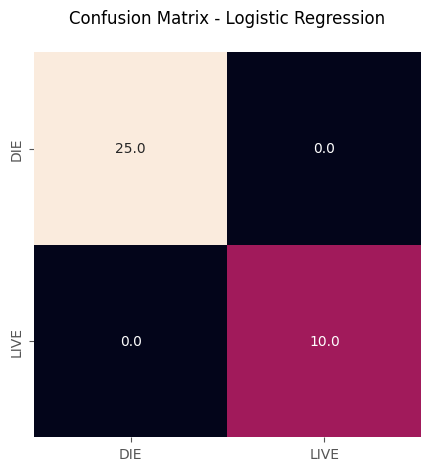

In [94]:
# figure object
# _ = plt.figure(figsize=(5, 5))

# plot confusion matrix
sns.heatmap(metrics_logReg.confusionMatrix().toArray(),
            # cmap='viridis',
            annot=True, fmt='0',
            cbar=False, 
            xticklabels=labels, 
            yticklabels=labels)

plt.title('Confusion Matrix - Logistic Regression\n', size=12)
plt.show()

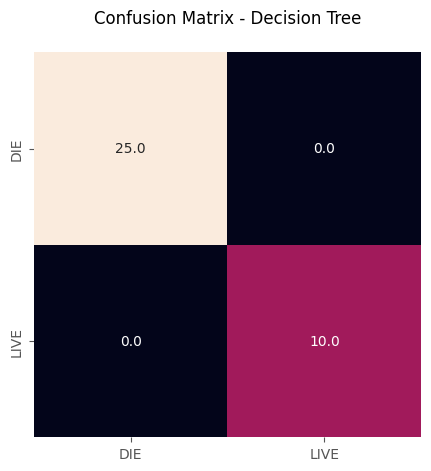

In [95]:
# figure object
# _ = plt.figure(figsize=(5, 5))

# plot confusion matrix
sns.heatmap(metrics_decTree.confusionMatrix().toArray(),
            # cmap='viridis',
            annot=True, fmt='0',
            cbar=False, 
            xticklabels=labels, 
            yticklabels=labels)

plt.title('Confusion Matrix - Decision Tree\n', size=12)
plt.show()

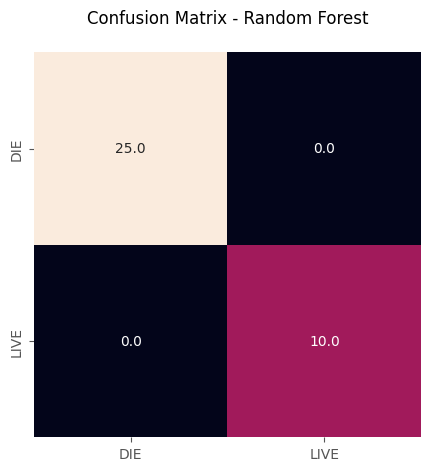

In [96]:
# figure object
# _ = plt.figure(figsize=(5, 5))

# plot confusion matrix
sns.heatmap(metrics_randFor.confusionMatrix().toArray(),
            # cmap='viridis',
            annot=True, fmt='0',
            cbar=False, 
            xticklabels=labels, 
            yticklabels=labels)

plt.title('Confusion Matrix - Random Forest\n', size=12)
plt.show()

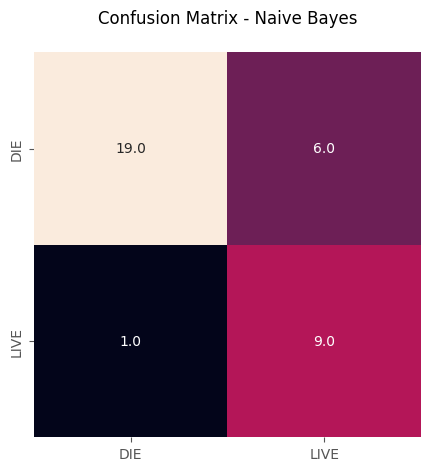

In [97]:
# figure object
# _ = plt.figure(figsize=(5, 5))

# plot confusion matrix
sns.heatmap(metrics_nBayes.confusionMatrix().toArray(),
            # cmap='viridis',
            annot=True, fmt='0',
            cbar=False, 
            xticklabels=labels, 
            yticklabels=labels)

plt.title('Confusion Matrix - Naive Bayes\n', size=12)
plt.show()

In [98]:
mdl_randFor.save('model_randForClassifier')

In [99]:
mdl_randFor.write().save(path='myModel_PySpark')

In [100]:
%whos

Variable                            Type                                 Data/Info
----------------------------------------------------------------------------------
DecisionTreeClassifier              ABCMeta                              <class 'pyspark.ml.classi<...>.DecisionTreeClassifier'>
FloatType                           DataTypeSingleton                    <class 'pyspark.sql.types.FloatType'>
LogisticRegression                  ABCMeta                              <class 'pyspark.ml.classi<...>tion.LogisticRegression'>
MulticlassClassificationEvaluator   ABCMeta                              <class 'pyspark.ml.evalua<...>ClassificationEvaluator'>
MulticlassMetrics                   type                                 <class 'pyspark.mllib.eva<...>ation.MulticlassMetrics'>
NaiveBayes                          ABCMeta                              <class 'pyspark.ml.classification.NaiveBayes'>
RandomForestClassifier              ABCMeta                              <class 'pyspar

In [101]:
%who_ls

['DecisionTreeClassifier',
 'FloatType',
 'LogisticRegression',
 'MulticlassClassificationEvaluator',
 'MulticlassMetrics',
 'NaiveBayes',
 'RandomForestClassifier',
 'SparkSession',
 'StringIndexer',
 'VectorAssembler',
 'acc_decTree',
 'acc_logReg',
 'acc_nBayes',
 'acc_randFor',
 'cat_encoder',
 'col',
 'conf_mat_decTree',
 'conf_mat_logReg',
 'conf_mat_nBayes',
 'conf_mat_randFor',
 'confusion_matrix',
 'dataframe_dim',
 'df',
 'df2',
 'df_pred_decTree',
 'df_pred_logReg',
 'df_pred_nBayes',
 'df_pred_randFor',
 'df_spark',
 'eval',
 'features',
 'indexer',
 'labels',
 'mdl_decTree',
 'mdl_logReg',
 'mdl_nBayes',
 'mdl_randFor',
 'mdl_training_decTree',
 'mdl_training_logReg',
 'mdl_training_nBayes',
 'mdl_training_randFor',
 'metrics_decTree',
 'metrics_logReg',
 'metrics_nBayes',
 'metrics_randFor',
 'pd',
 'plt',
 'pred_decTree',
 'pred_logReg',
 'pred_nBayes',
 'pred_randFor',
 'preds_and_labels_decTree',
 'preds_and_labels_logReg',
 'preds_and_labels_nBayes',
 'preds_and_label